In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import pickle




1.Load the dataset into the tool.

In [ ]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('/content/gold-dataset-sinha-khandait.csv')
print(data.head())

        Dates                                                URL  \
0  28-01-2016  http://www.marketwatch.com/story/april-gold-do...   
1  13-09-2017  http://www.marketwatch.com/story/gold-prices-s...   
2  26-07-2016  http://www.marketwatch.com/story/gold-futures-...   
3  28-02-2018  https://www.metalsdaily.com/link/277199/dent-r...   
4  06-09-2017  http://www.marketwatch.com/story/gold-steadies...   

                                                News  Price Direction Up  \
0  april gold down 20 cents to settle at $1,116.1...                   0   
1          gold suffers third straight daily decline                   0   
2     Gold futures edge up after two-session decline                   1   
3  dent research : is gold's day in the sun comin...                   0   
4  Gold snaps three-day rally as Trump, lawmakers...                   0   

   Price Direction Constant  Price Direction Down  Asset Comparision  \
0                         0                     1             

In [ ]:
#read the data
df=pd.read_csv("gold-dataset-sinha-khandait.csv")

In [ ]:
df

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


Data Preparation

     Handling Missing values..

In [ ]:
#check shape of data set
df.shape

(10570, 10)

In [ ]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     10570 non-null  object
 1   URL                       10570 non-null  object
 2   News                      10570 non-null  object
 3   Price Direction Up        10570 non-null  int64 
 4   Price Direction Constant  10570 non-null  int64 
 5   Price Direction Down      10570 non-null  int64 
 6   Asset Comparision         10570 non-null  int64 
 7   Past Information          10570 non-null  int64 
 8   Future Information        10570 non-null  int64 
 9   Price Sentiment           10570 non-null  object
dtypes: int64(6), object(4)
memory usage: 825.9+ KB


In [ ]:
df.isnull().sum()

Dates                       0
URL                         0
News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
dtype: int64

handling categorical values...

In [ ]:
df['Price Sentiment'].value_counts()

positive    4412
negative    3814
none        1968
neutral      376
Name: Price Sentiment, dtype: int64

In [ ]:
df['Price Sentiment'].unique()

array(['negative', 'positive', 'none', 'neutral'], dtype=object)

In [ ]:
df['Price Sentiment']=df['Price Sentiment'].map({'negative':1,'positive':2,'neutral':3,'none':2})

handling imbalance data...

2    6380
1    3814
3     376
Name: Price Sentiment, dtype: int64

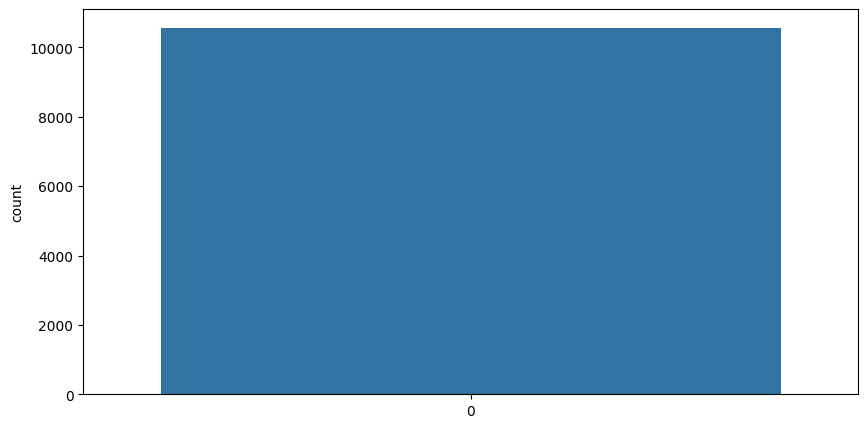

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(df['Price Sentiment'])
df['Price Sentiment'].value_counts()

Descriptive Statistical..

In [ ]:
#describe the dataset...
df.describe(include='all')

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
count,10570,10570,10570,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.00000,10570.000000
unique,3761,10570,10570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,30-08-2017,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.417408,0.042006,0.370104,0.189309,0.969915,0.03018,1.674740
std,NaN,NaN,NaN,0.493155,0.200612,0.482855,0.391773,0.170830,0.17109,0.539109
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,2.000000
75%,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,2.000000


Perform below visualization.

 Univariate ,Bivariate ,Multivariate.

<Axes: xlabel='News', ylabel='Count'>

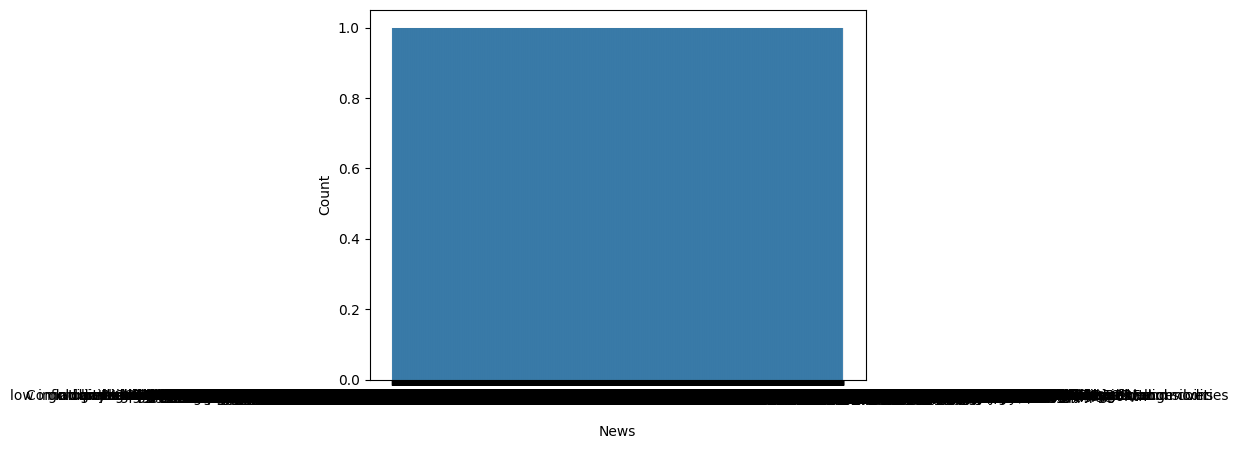

In [ ]:
sns.histplot(data['News'])

2    6380
1    3814
3     376
Name: Price Sentiment, dtype: int64

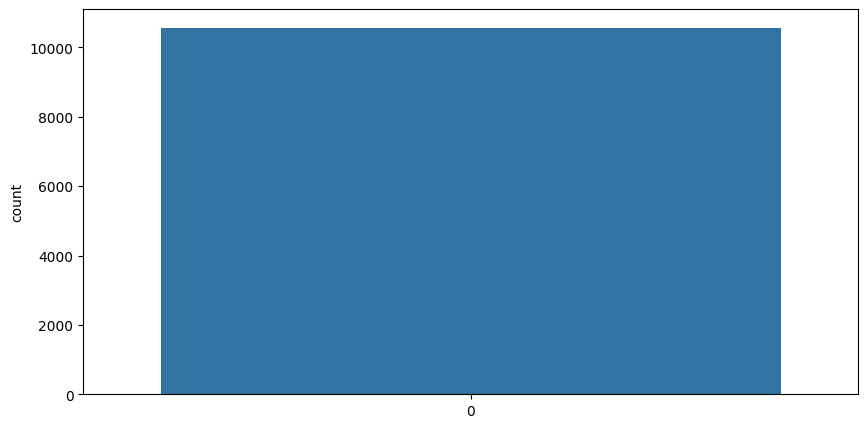

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['Price Sentiment'])
df['Price Sentiment'].value_counts()

bivariate analysis

<Axes: xlabel='Past Information', ylabel='News'>

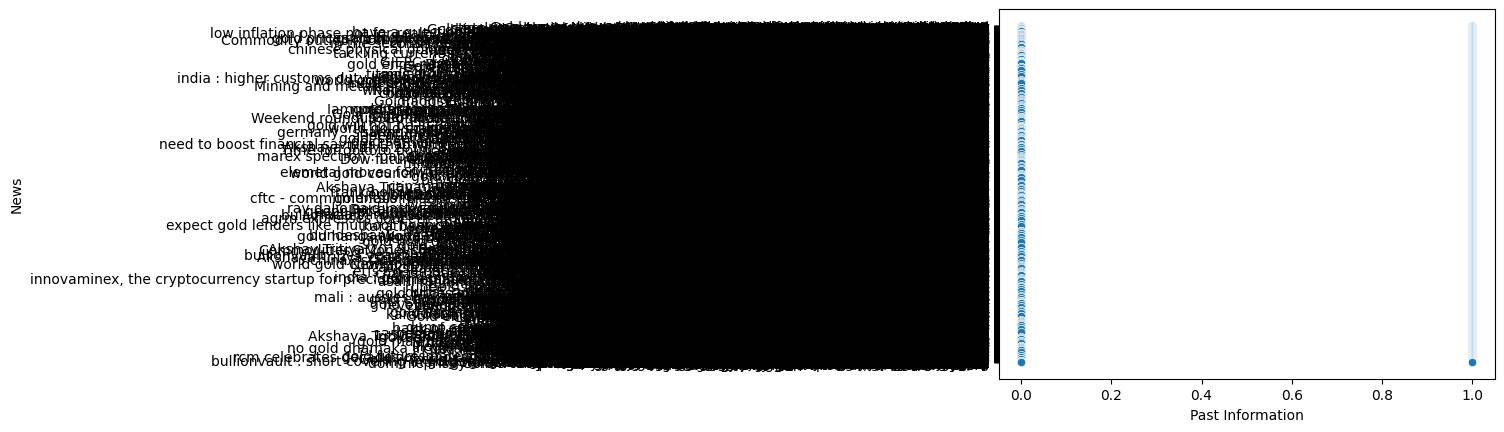

In [ ]:
sns.scatterplot(x=data['Past Information'],
				y=data['News'])


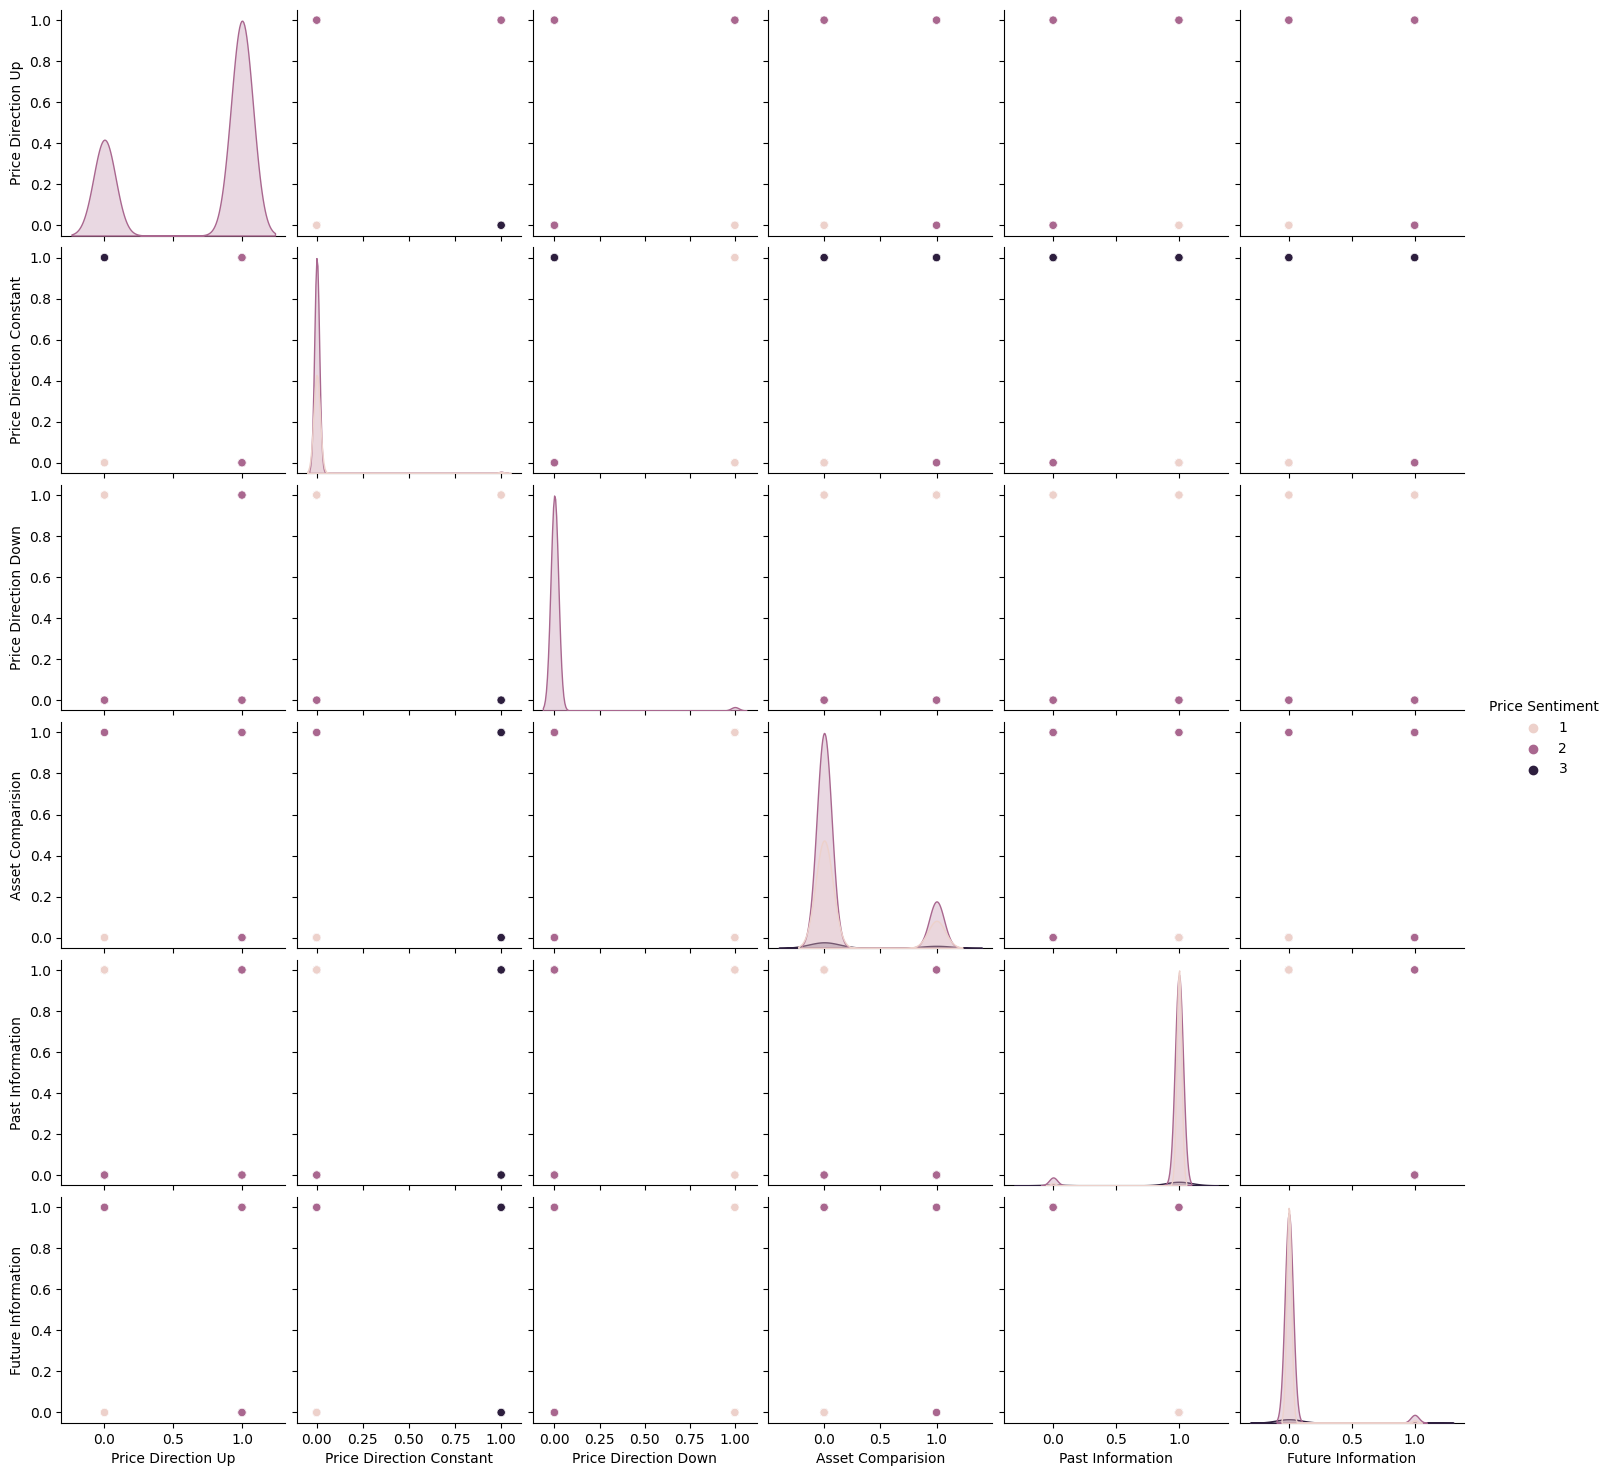

In [ ]:
sns.pairplot(df, hue='Price Sentiment')

multivariate analysis..

<ipython-input-47-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

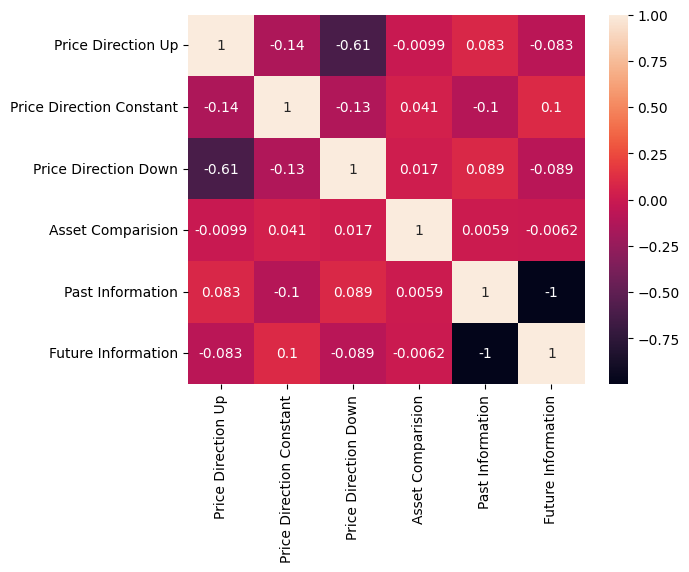

In [ ]:
sns.heatmap(data.corr(), annot=True)

Text Pre Processing..

In [ ]:
#applying the textcleaning
import re
import string

def text_clean_1(text):
  text=text.lower()
  text=re.sub('\[.*]','',text)
  text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub('[''"" ...]','',text)
  return text
  Cleaned_News=lambda x: text_clean_1(x)

Splitting data into train and test...

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('gold-dataset-sinha-khandait.csv')

# Split into independent and dependent variables
X = df.drop('News', axis=1) # independent variables
y = df['News'] # dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8456 entries, 3995 to 7270
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     8456 non-null   object
 1   URL                       8456 non-null   object
 2   Price Direction Up        8456 non-null   int64 
 3   Price Direction Constant  8456 non-null   int64 
 4   Price Direction Down      8456 non-null   int64 
 5   Asset Comparision         8456 non-null   int64 
 6   Past Information          8456 non-null   int64 
 7   Future Information        8456 non-null   int64 
 8   Price Sentiment           8456 non-null   object
dtypes: int64(6), object(3)
memory usage: 660.6+ KB
None


In [ ]:
print(y_train.info())

<class 'pandas.core.series.Series'>
Int64Index: 8456 entries, 3995 to 7270
Series name: News
Non-Null Count  Dtype 
--------------  ----- 
8456 non-null   object
dtypes: object(1)
memory usage: 132.1+ KB
None


Build the model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('gold-dataset-sinha-khandait.csv')

# Remove rows with missing values
df = df.dropna()

# Split into independent and dependent variables
X = df.drop('Price Direction Constant', axis=1) # independent variables
y = df['Price Direction Constant'] # dependent variable

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)
# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)


R-squared score: 0.8267570984741566


Model building with SVM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
svm=SVC(kernel='linear')
tvec=TfidfVectorizer()

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

svm = SVC(kernel='linear')
tvec = TfidfVectorizer()

model2 = Pipeline([('vectorizer', tvec), ('classifier', svm)])

model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test)
pred2_train = model2.predict(X_train)

confusion_matrix(predictions2, y_test)


AttributeError: ignored

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
svm = SVC(kernel='linear')
tvec = TfidfVectorizer()
from sklearn.pipeline import Pipeline

model2 = Pipeline([('vectorizer', tvec), ('classifier', svm)])

X_train = X_train.values
y_train = y_train.values

model2.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
predictions2 = model2.predict(X_test)
pred2_train = model2.predict(X_train)

confusion_matrix(predictions2, y_test)


AttributeError: ignored

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
svm=SVC(kernel='linear')
tvec=TfidfVectorizer()
from sklearn.pipeline import Pipeline
model2=Pipeline([('vectorizer',TfidfVectorizer),('classifier',svm)])
X_train = X_train.values
y_train = y_train.values
model2.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
predictions2=model2.predict(X_test)
pred2_train=model2.predict(X_train)
confusion_matrix(predictions2,y_test)

AttributeError: ignored

model building with logistic regression...

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec=TfidfVectorizer()
clf2=LogisticRegression()


Testing the model..

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('gold-dataset-sinha-khandait.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Split into independent and dependent variables
X = df['News']
y = df['Price Direction Up']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Make predictions on the testing data
predictions = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(cm)


NameError: ignored

In [ ]:
data = pd.read_csv('gold-dataset-sinha-khandait.csv')

In [ ]:
X = data.drop('News', axis=1)
y = data['News']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df_dummies = pd.get_dummies(df, columns=['Dates', 'URL', 'Price Direction Up',  'Asset Comparision', ], drop_first=True)

In [ ]:
print(df_dummies.head())

                                                News  \
0  april gold down 20 cents to settle at $1,116.1...   
1          gold suffers third straight daily decline   
2     Gold futures edge up after two-session decline   
3  dent research : is gold's day in the sun comin...   
4  Gold snaps three-day rally as Trump, lawmakers...   

   Price Direction Constant  Price Direction Down  Past Information  \
0                         0                     1                 1   
1                         0                     1                 1   
2                         0                     0                 1   
3                         0                     0                 0   
4                         0                     1                 1   

   Future Information Price Sentiment  Dates_01-01-2009  Dates_01-01-2015  \
0                   0        negative                 0                 0   
1                   0        negative                 0                 0   
2    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


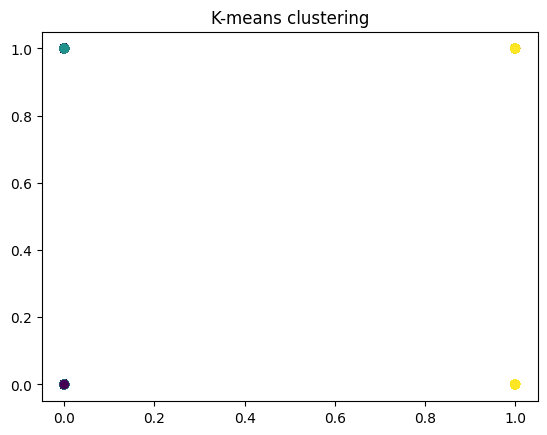

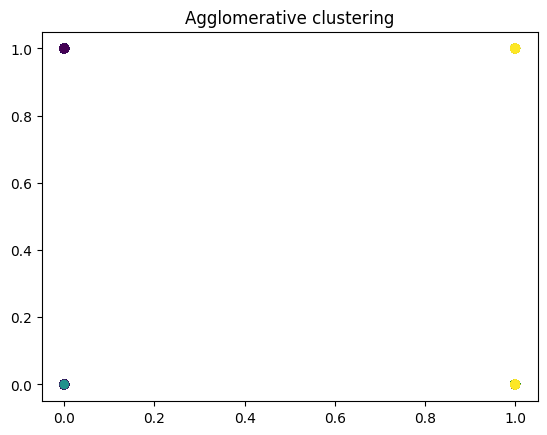

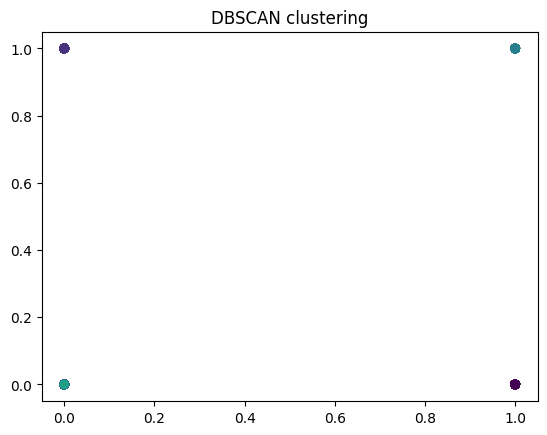

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the gold dataset
df = pd.read_csv("gold-dataset-sinha-khandait.csv")

# Drop rows with missing values
df = df.dropna()

# Scale the numeric columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Price Direction Down', 'Price Direction Up', 'Asset Comparision',]])

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_scaled)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.7, min_samples=3)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Add the cluster labels to the original dataset
df['kmeans_cluster'] = kmeans_labels
df['agg_cluster'] = agg_labels
df['dbscan_cluster'] = dbscan_labels

# Plot the clusters
plt.scatter(df['Price Direction Down'], df['Price Direction Up'], c=kmeans_labels)
plt.title("K-means clustering")
plt.show()

plt.scatter(df['Price Direction Down'], df['Price Direction Up'], c=agg_labels)
plt.title("Agglomerative clustering")
plt.show()

plt.scatter(df['Price Direction Down'], df['Price Direction Up'], c=dbscan_labels)
plt.title("DBSCAN clustering")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('gold-dataset-sinha-khandait.csv')

# Remove rows with missing values
df = df.dropna()

# Split into independent and dependent variables
X = df.drop('Asset Comparision', axis=1) # independent variables
y = df['Asset Comparision'] # dependent variable

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()



# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)


R-squared score: -0.03721313968757167


test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv('gold-dataset-sinha-khandait.csv')

# Preprocess data
df = df.dropna() # remove rows with missing values
df = pd.get_dummies(df, columns=['Price Sentiment', 'Future Information']) # convert categorical variables to binary

# Split into independent and dependent variables
X = df.drop('Price Direction Down', axis=1) # independent variables
y = df['Price Direction Down'] # dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
score = model.score(X_test, y_test)
print('Accuracy:', score)


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score


In [ ]:
# Assuming your gold dataset is in a CSV file
data = pd.read_csv("gold-dataset-sinha-khandait.csv")


In [ ]:
X = data.drop("Asset Comparision", axis=1)  # Replace "target_column_name" with the actual column name
y = data["Asset Comparision"]


save the best model

In [ ]:
import pickle
pickle.dump(model,open('goldnewsanalysis.pkl','wb'))

Integrated with web framework..

In [ ]:
from flask import Flask,render_template,url_for,request,redirect,session
import pickle
import os
import re


In [ ]:
from flask import Flask

app = Flask(__name__)
model=pickle.load(open('goldnewsanalysis.pkl','rb'))

In [ ]:
import pandas as pd

# Load the gold dataset into a pandas DataFrame
gold_dataset = pd.read_csv('gold-dataset-sinha-khandait.csv')

# Create the HTML table
html_table = gold_dataset.to_html(index=False)

# Define the HTML template
template = f'''
<html>
<head>
    <title>Gold Dataset</title>
    <style>
        table {{border-collapse: collapse;}}
        th, td {{padding: 8px; border: 1px solid black;}}
    </style>
</head>
<body>
    <h1>Gold Dataset</h1>
    {html_table}
</body>
</html>
'''

# Save the HTML to a file
with open('index.html', 'w') as file:
    file.write(template)


In [ ]:
@app.route('/',methods=['POST','GET'])
def homepage():
   return render_template('index.html')

In [ ]:
from flask import Flask, render_template, request

@app.route('/', methods=['POST', 'GET'])
def Predictionpage():
    if request.method == 'POST':
        newsline = request.form["newheadline"]
        pred = [newsline]
        output = model.predict(pred)
        print(output)
        if output == ['positive']:
            return render_template('index.html', output_msg='Upward movement in the gold price')
        elif output == ['negative']:
            return render_template('index.html', output_msg='Downward movement in the gold price')
        elif output == ['neutral']:
            return render_template('index.html', output_msg='Steady movement in the gold price')
        elif output == ['none']:
            return render_template('index.html', output_msg='This news headline is not related to gold news')

    return render_template('index.html', output_msg='')


In [ ]:
from flask import Flask, render_template, request

app = Flask(__name__)

# Route definition and prediction logic...

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
